<a href="https://colab.research.google.com/github/shazzad-hasan/experiments/blob/main/law_of_large_numbers/fair_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Coin:
  def __init__(self, weight = 0.5):
    self.weight = weight
    self.outcomes = np.array([])
  
  def flip(self, N): # flip the coin N times, and record the outcomes
    rng = np.random.default_rng(seed=125)
    rints = rng.integers(low=0, high=10, size=N)
    self.outcomes = np.append(self.outcomes, np.where(rints >= 10 * self.weight, 0, 1))

  def num_heads(self, flips): # count num of heads
    return int(np.sum(self.outcomes[:flips]))
  
  def num_tails(self, flips): # count num of tails
    return int(len(self.outcomes[:flips]) - np.sum(self.outcomes[:flips]))

coin = Coin()

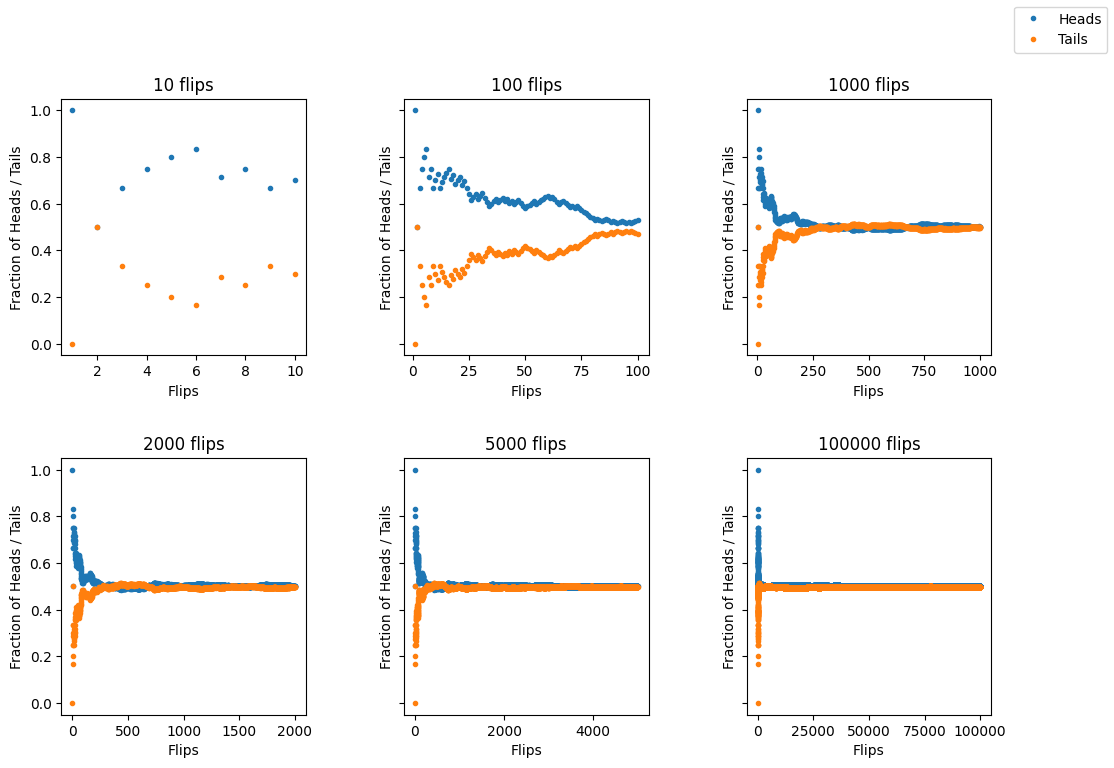

In [3]:
sample_sizes = [10, 100, 1000, 2000, 5000, 100000]

fig, ax = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, N in enumerate(sample_sizes):
  if i < 3: j = 0
  else: j = 1

  coin.flip(N)

  heads = [coin.num_heads(i) for i in range(1, N+1)]
  frac_heads = np.array(heads)/np.array([i for i in range(1, N+1)])
  tails = np.array([coin.num_tails(i) for i in range(1, N+1)])
  frac_tails = np.array(tails)/np.array([i for i in range(1, N+1)])

  ax[j, i - j*3].plot(np.linspace(1, N, N), frac_heads, '.', label='Heads')
  ax[j, i - j*3].plot(np.linspace(1, N, N), frac_tails, '.', label='Tails')
  
  ax[j, i - j*3].set_title(f"{N} flips")
  ax[j, i - j*3].set_ylabel("Fraction of Heads / Tails")
  ax[j, i - j*3].set_xlabel("Flips")

fig.legend(['Heads', 'Tails'], loc='upper right')
plt.show()